In [ ]:
# Download csv file from:
# https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

###Data preparation

Based on this student dataset, we will create two models: logistic regression and a neural network, to analyze and predict student dropouts. These models will help us identify factors contributing to students leaving their studies.

In [ ]:
df = pd.read_csv("students.csv")
df

# This data has 4424 observations and 35 variables (in which one is a Target variable).
# There are numerical and categorical variables.

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
# This confirms, that there are no missing values that would need to be handled
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [ ]:
#Look into target
df["Target"].unique()

# Target has 3 unique values:

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
# Since we want to predict student dropouts, "Dropout" will be possitive (1)
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

df["Target"].unique()
# Now there are only 2 unique variables

array([1, 0])

Dropout: 1, Enrolled and Graduate: 0
Target
0    3003
1    1421
Name: count, dtype: int64


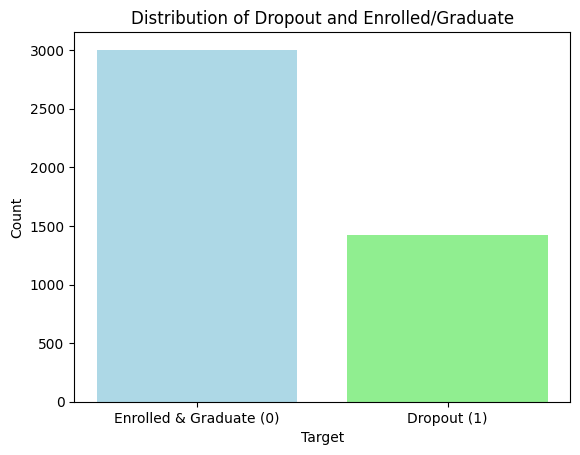

In [ ]:
print("Dropout: 1, Enrolled and Graduate: 0")
value_counts = df['Target'].value_counts()
print(value_counts)

plt.bar(value_counts.index, value_counts.values, color=['lightblue', 'lightgreen'])
plt.xticks(value_counts.index, ['Enrolled & Graduate (0)', 'Dropout (1)'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Dropout and Enrolled/Graduate')
plt.show()
# 1421 students in the data are dropouts

In [ ]:
# Calculate class proportions
value_counts = df['Target'].value_counts(normalize=True)
print(value_counts)

Target
0    0.678797
1    0.321203
Name: proportion, dtype: float64


In [ ]:
correlation = df.corr()['Target'].sort_values(ascending=False)
correlation

,Target
Target,1.000000
Age at enrollment,0.254215
Debtor,0.229407
Gender,0.203983
Application mode,0.188908
Marital status,0.093712
Previous qualification,0.091590
Curricular units 2nd sem (without evaluations),0.079901
Mother's qualification,0.059499
Curricular units 1st sem (without evaluations),0.054230


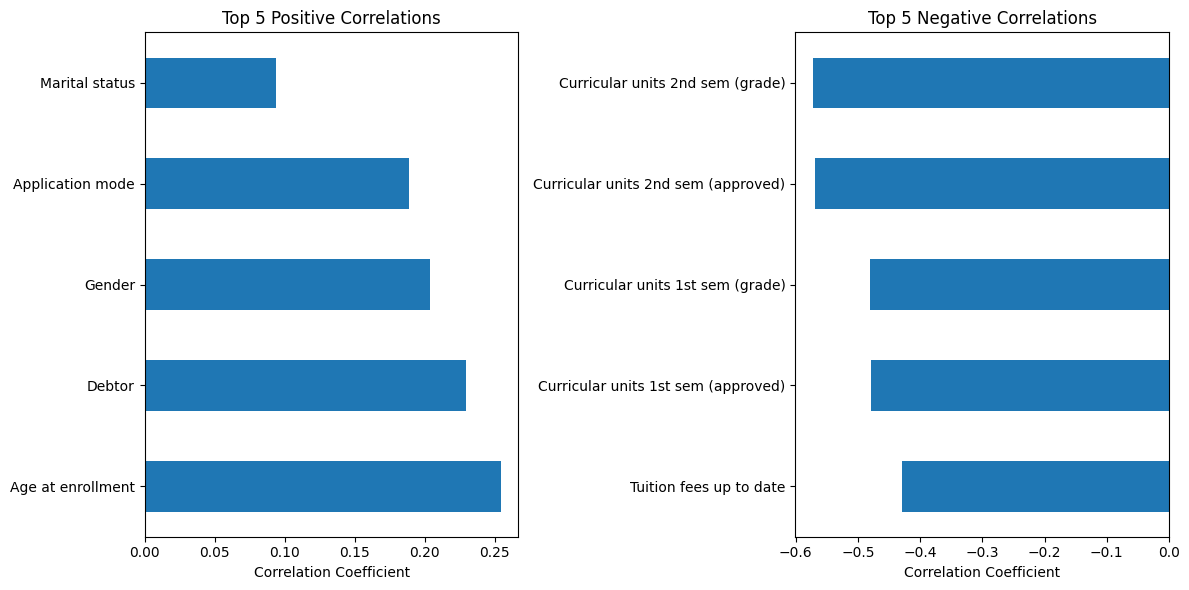

In [ ]:
correlation = correlation.drop('Target')

positive_correlations = correlation[0:5]
negative_correlations = correlation[-5:]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot positive correlations
positive_correlations.plot(kind='barh', ax=axes[0], title='Top 5 Positive Correlations')
axes[0].set_xlabel("Correlation Coefficient")

# Plot negative correlations
negative_correlations.plot(kind='barh', ax=axes[1], title='Top 5 Negative Correlations')
axes[1].set_xlabel("Correlation Coefficient")


plt.tight_layout()
plt.show()

### Logistic Regression (without balances data)

In [ ]:

X=df.drop('Target', axis=1)
Y=df['Target']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=42)

lr_model=LogisticRegression()
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions=lr_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))

Accuracy: 0.8712349397590361


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       887
           1       0.85      0.75      0.79       441

    accuracy                           0.87      1328
   macro avg       0.86      0.84      0.85      1328
weighted avg       0.87      0.87      0.87      1328



###Logistic Regression with Balanced data

I will compare it with the previous model.

In [ ]:
X=df.drop('Target', axis=1)
Y=df['Target']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=42)

lr_model=LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
predictions=lr_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))

Accuracy: 0.8659638554216867


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       887
           1       0.77      0.84      0.81       441

    accuracy                           0.87      1328
   macro avg       0.85      0.86      0.85      1328
weighted avg       0.87      0.87      0.87      1328



I will choose this model with balanced data because for my "client" - univeristy it is more important to capture as many dropouts as possible.

Conclusions:
- Good **accuracy**: 0.87. It doesn't point to overfitting or underfitting.

- **Precision** is 0.77, which is good. It tells how many predicted positives are correct. For 23% my model incorrectly predicted that this person is a dropout.
- **Recall** is high (0.84), which means it successfully identifies positive cases  (if someone is a dropout). It tells how many actual positives were identified.

- High score of **f1** (0.81) indicates that there is a good balance between precision and recall.

### Odds ratio

In [ ]:
# Feature coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_[0]
})

coefficients["Odds Ratio"] = np.exp(coefficients["Coefficient"])

# Sort by importance (odds ratio)
coefficients = coefficients.sort_values(by="Odds Ratio", ascending=False)

# Print the results
print(coefficients)

                                           Feature  Coefficient  Odds Ratio
13                                          Debtor     0.736069    2.087712
26             Curricular units 2nd sem (enrolled)     0.475375    1.608617
11                                       Displaced     0.367891    1.444685
15                                          Gender     0.259617    1.296433
4                       Daytime/evening attendance     0.258450    1.294921
25             Curricular units 2nd sem (credited)     0.220226    1.246359
19             Curricular units 1st sem (credited)     0.166522    1.181189
3                                           Course     0.090501    1.094722
31                               Unemployment rate     0.086891    1.090778
23                Curricular units 1st sem (grade)     0.068860    1.071286
2                                Application order     0.064017    1.066111
17                               Age at enrollment     0.048289    1.049474
20          

Interpretation of coefficients:

**Possitive Coefficients:**
* `Debtor` (coefficient: 0.736069) suggests that being a debtor strongly increases the likelihood of dropout.

Odds Ratio of 2.087712 means that for every 1-unit increase in the Debtor feature, the odds of being a dropout increase by approximately 2.09 times

* `Curricular units 2nd sem (enrolled)` (coefficient: 0.475375)

Odds Ratio: for every 1-unit increase in this feature the odds of being a dropout increase by 60.86%.

* `Displaced` (0.367891) : Those students are more likely to drop out.

Odds Ratio: for every 1-unit increase in being "displaced", the odds of being a dropout increase by 44.47%




**Negative Coefficients:**
* `Tuition fees up to date` (coefficient: -1.993841) significantly reduces the likelihood of dropout.

* `Curricular units 2nd sem (approved)` (-0.651349): Students who pass their 2nd semester units and being a `Scholarship holder` ( -0.351151) also reduces dropout likelihood.


##Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,\
OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#1. select columns for one-hot encoding and normalization
num_labels = X_train.select_dtypes('number').columns
cat_labels = X_train.select_dtypes('object').columns

#2. define preprocessors for each columns group

num_preprocessor =  StandardScaler()
cat_preprocessor = OneHotEncoder(drop = 'first') #odrzucamy pierwszą żeby nie było współliniowości

#3. combine it all together
preprocessor = ColumnTransformer([('cat', cat_preprocessor, cat_labels),
                                 ('num', num_preprocessor, num_labels)])

# Fit the preprocessor only on the training data
preprocessor.fit(X_train)

# Transform both training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
3691,1,8,5,7,1,1,1,13,1,5,...,0,0,5,14,1,11.000000,0,8.9,1.4,3.51
1844,1,1,6,12,1,1,1,1,1,10,...,0,1,8,11,8,12.361111,0,12.4,0.5,1.79
613,1,8,3,9,1,1,1,1,14,6,...,0,0,5,7,5,13.200000,0,12.4,0.5,1.79
2974,1,1,1,2,1,1,1,1,14,15,...,0,0,0,0,0,0.000000,0,13.9,-0.3,0.79
1611,1,7,5,6,1,1,1,13,27,9,...,2,0,5,7,5,12.400000,0,9.4,-0.8,-3.12


### Model Architecture
A feedforward neural network is implemented using TensorFlow and Keras. The model includes:

**Input Layer**: Matches the number of features in the transformed dataset (input_shape).

**Hidden Layers**: Three Dense layers with ReLU activation functions and decreasing units (128, 64, and 32).

**Output Layer**: A single neuron with a sigmoid activation function for binary classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Define the input shape based on transformed data
input_shape = X_train_transformed.shape[1]

# Create the Sequential model with an Input layer
model = Sequential([
    Input(shape=(input_shape,)),  # Define the input shape here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming a binary classification
])

# Compile and fit the model as usual
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_transformed, Y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7285 - loss: 0.5332 - val_accuracy: 0.8698 - val_loss: 0.3246
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8773 - loss: 0.3079 - val_accuracy: 0.8698 - val_loss: 0.3167
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8835 - loss: 0.2785 - val_accuracy: 0.8719 - val_loss: 0.3115
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.2817 - val_accuracy: 0.8644 - val_loss: 0.3296
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9079 - loss: 0.2283 - val_accuracy: 0.8708 - val_loss: 0.3152
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9007 - loss: 0.2476 - val_accuracy: 0.8698 - val_loss: 0.3080
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.2256 - val_accuracy: 0.8676 - val_loss: 0.3122
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.2048 - val_accuracy: 0.8741 - val_loss:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_transformed, Y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 1.2076 
Test Loss: 1.3377
Test Accuracy: 0.8509


In [ ]:
Y_pred = model.predict(X_test_transformed)
Y_pred_classes = (Y_pred > 0.15).astype("int32")

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


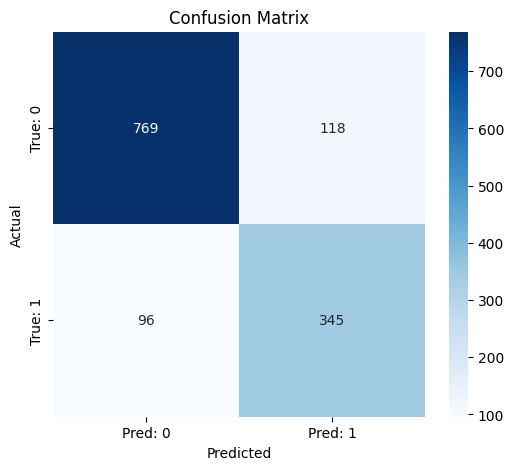

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(Y_test, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       887
           1       0.75      0.78      0.76       441

    accuracy                           0.84      1328
   macro avg       0.82      0.82      0.82      1328
weighted avg       0.84      0.84      0.84      1328



#### Some conclusions on the model:

**Good Overall Accuracy**: The model achieves an accuracy of 84%, indicating that it correctly classifies the majority of the samples.

**Strong Performance on Majority Class (Class 0)**: The model has high precision (0.89) and recall (0.87) for Class 0, resulting in a strong F1-score (0.88).

**Weaker Performance on Minority Class (Class 1)**: Precision (0.75) and recall (0.78) for Class 1 are lower, with an F1-score of 0.76, indicating challenges in correctly identifying this class.

**Class Imbalance Impact**: The weighted-average F1-score (0.84) reflects a slight bias toward Class 0, likely due to class imbalance in the dataset.

**Confusion Matrix Insights**: The model misclassifies 96 Class 1 samples as Class 0 (false negatives) and 118 Class 0 samples as Class 1 (false positives), showing areas for improvement.

**Improvement Suggestions**: Address class imbalance with oversampling or class weights, and explore hyperparameter tuning or model adjustments to improve recall and precision for Class 1.

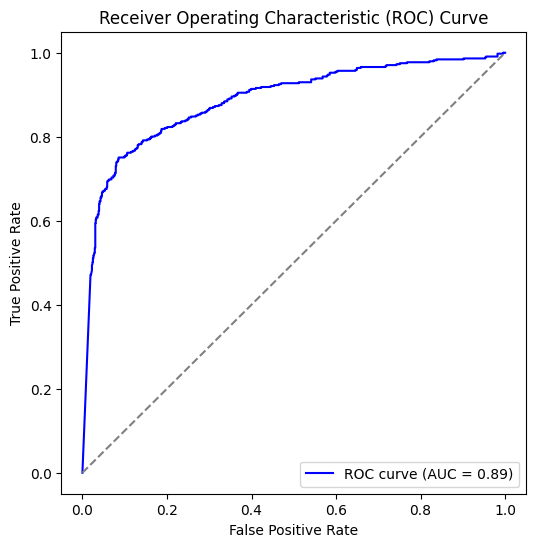

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()